In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import pandas as pd

In [50]:
yahoo = pd.read_csv('yahoo_csv.csv')

In [52]:
yahoo1 = yahoo.rename(columns={"Adj Close": "adj_close","Volume":"volume"})
yahoo1

,Date,Open,High,Low,Close,adj_close,volume
0,2019-11-01,25.760000,26.840000,25.690001,26.299999,25.911707,86900
1,2019-11-04,26.200001,26.250000,25.430000,25.629999,25.251598,60100
2,2019-11-05,25.809999,26.129999,25.549999,25.590000,25.212189,65300
3,2019-11-06,25.490000,25.770000,24.969999,25.040001,24.670309,80300
4,2019-11-07,24.990000,25.469999,24.680000,25.420000,25.119938,105800
...,...,...,...,...,...,...,...
247,2020-10-26,24.490000,24.490000,23.709999,24.040001,24.040001,48400
248,2020-10-27,24.049999,24.379999,23.750000,24.260000,24.260000,88800
249,2020-10-28,24.070000,26.180000,23.600000,25.500000,25.500000,304500
250,2020-10-29,25.780001,26.230000,25.070000,25.700001,25.700001,123000


In [46]:
# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
# price_data = (cbook.get_sample_data('goog.npz', np_load=True)['price_data']
#               .view(np.recarray))
price_data = yahoo1[-250:]  # get the most recent 250 trading days
price_data.volume.iloc[0]

65300

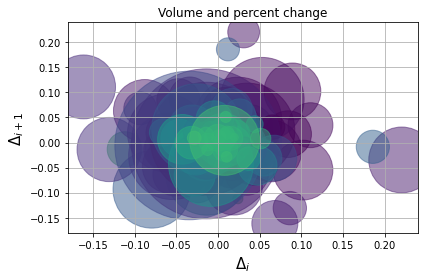

In [53]:
delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume.iloc[:-2] / price_data.volume.iloc[0])**2
close = 0.003 * price_data.Close.iloc[:-2] / 0.003 * price_data.Open.iloc[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()